In [2]:
# 01_segment_ribeye.ipynb

import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
from segment_anything import sam_model_registry, SamPredictor

In [3]:
# 🔧 Paths
checkpoint_path = "../checkpoints/sam_vit_h.pth"
image_path = "../imgs/marbling.jpg"

# 📷 Cargar imagen
image_bgr = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

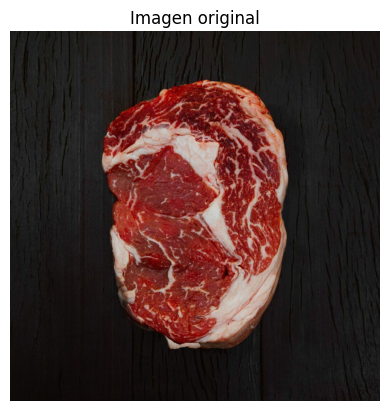

In [4]:
plt.imshow(image_rgb)
plt.title("Imagen original")
plt.axis("off")
plt.show()


In [5]:

# 🧠 Cargar modelo SAM
sam = sam_model_registry["vit_h"](checkpoint=checkpoint_path)
device = "cuda" if torch.cuda.is_available() else "cpu"
sam.to(device=device)

: 

In [ ]:

predictor = SamPredictor(sam)
predictor.set_image(image_rgb)

# 🎯 Simulación de un punto de carne y uno de grasa (ejemplo visual, se puede mejorar)
input_points = np.array([[200, 300], [400, 300]])  # X, Y
input_labels = np.array([1, 1])  # 1 = foreground

In [ ]:
# 🎭 Segmentación con SAM
masks, scores, logits = predictor.predict(
    point_coords=input_points,
    point_labels=input_labels,
    multimask_output=True
)

In [ ]:
# 🎨 Mostrar máscaras
for i, mask in enumerate(masks):
    plt.figure()
    plt.imshow(image_rgb)
    plt.imshow(mask, alpha=0.5)
    plt.title(f"Máscara {i+1} - Score: {scores[i]:.3f}")
    plt.axis("off")
    plt.show()